In [1]:
#import libraries and dependencies

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# downloading stock data

stock = 'AAPL'
data = yf.download(stock, '2017-01-01', '2022-04-14').drop(columns='Adj Close')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,134247600
...,...,...,...,...,...
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700


In [3]:
# Strategy parameters
short_ma = 5
long_ma = 12

In [4]:
#coding technical analysis signals

data['MA' +str(short_ma)] = data['Close'].rolling(short_ma).mean()
data['MA' +str(long_ma)] = data['Close'].rolling(long_ma).mean()
data['return'] = data['Close'].pct_change()

print(data['return'].head())

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
Name: return, dtype: float64


In [5]:
#simulating trading strategies
start = long_ma
data['signal'] = 2*(data['MA'+str(short_ma)] > data['MA'+str(long_ma)]) -1

In [6]:
# Buy and Hold strategy
BnH_return = np.array(data['return'][start+1:])
BnH = np.prod(1+BnH_return)**(252/len(BnH_return)) -1
BnH_risk = np.std(BnH_return)*(252)**(1/2)


In [7]:
# MACD Strategy
MACD_return = np.array(data['return'][start+1:])*np.array(data['signal'][start:-1])
MACD = np.prod(1+MACD_return)**(252/len(MACD_return)) -1
MACD_risk = np.std(MACD_return)*(252)**(1/2)

In [8]:
#visualizing the results
print('buy/hold strategy return and risk: '+str(round(BnH*100,2))+'% and '+str(round(BnH_risk*100,2))+'%')
print('MACD strategy return and risk: '+str(round(MACD*100,2))+'% and '+str(round(MACD_risk*100,2))+'%')

buy/hold strategy return and risk: 39.42% and 30.55%
MACD strategy return and risk: 22.47% and 30.61%


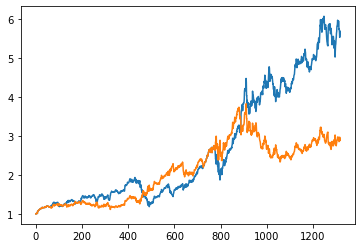

In [9]:
plt.plot(np.append(1,np.cumprod(1+BnH_return)))
plt.plot(np.append(1,np.cumprod(1+MACD_return)))